In [1]:
#A1
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)
#encoding="ISO-8859-1

# Combine the data into a single dataset
merge_table = pd.merge(df1, df2, on="Mouse ID", how="inner")
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#A2
#Create groupby object and convert to dataframe;"tumor vol vs timepoint" for each drug 
grouped_data_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
tumorvol_pivot = pd.pivot_table(grouped_data_vol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = 'Drug')

#convert back to df
qwe_df = pd.DataFrame(tumorvol_pivot)

In [3]:
#A3
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# and convert to dataframe
standard_error_tumor_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

#rename output column as 'tumor vol SE' (standard error)
standard_error_tumor_vol_df = standard_error_tumor_vol_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Vol SE'})
standard_error_tumor_vol_df.head(50)

#convert to pivot table to easily reorganize columns/rows
SE_pivot = pd.pivot_table(standard_error_tumor_vol_df, values = 'Tumor Vol SE', index = ['Timepoint'], columns = 'Drug')
SE_pivot.head()

#convert back to df
uio_df = pd.DataFrame(SE_pivot)

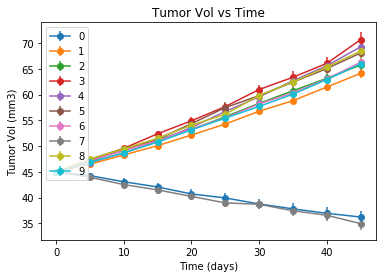

In [4]:
#plot with error bars for each drug
for i in range(0, 10):
    x = qwe_df.index
    y = qwe_df.iloc[:, i]
    t_error = uio_df.iloc[:, i]
    plt.errorbar(x, y, yerr=t_error, marker='o', label = i)


#plot labels of "tumor vol vs timepoint" 
plt.title("Tumor Vol vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)") 
plt.legend(loc='upper left')

Text(0, 0.5, 'Tumor Vol (mm3)')

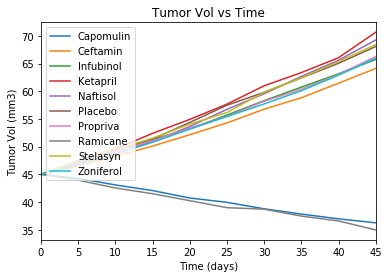

In [11]:
#efficient plot including proper legend, w/out error bars
tumorvol_pivot.plot()
plt.legend(loc='upper left')
plt.title("Tumor Vol vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)")

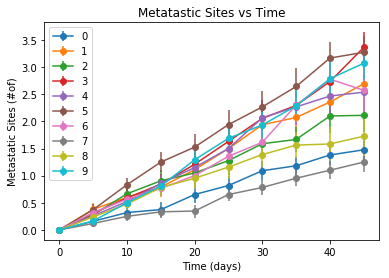

In [15]:
#A4

#Create groupby object and convert to dataframe; "metastatic (cancer spreading) sites vs timepoint" for each drug
grouped_data_metastatic_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
metatastic_pivot = pd.pivot_table(grouped_data_metastatic_df, values = 'Metastatic Sites',
                                index = ['Timepoint'], columns = 'Drug')
#convert back to df
abc_df = pd.DataFrame(metatastic_pivot)

#Convert groupby object and convert to df; "SE of Metatastic Sites vs Time"
standard_error_meta_sites_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

#Convert to pivot to easily set desired rows/columns
sites_error_pivot = pd.pivot_table(standard_error_meta_sites_df, values = 'Metastatic Sites', index = ['Timepoint'], columns = 'Drug')

#Convert back to df
fgt_df = pd.DataFrame(sites_error_pivot)


#plot with error bars for each drug
for i in range(0, 10):
    x = abc_df.index
    y = abc_df.iloc[:, i]
    o_error = fgt_df.iloc[:, i]
    plt.errorbar(x, y, yerr=o_error, marker='o', label = i)
    
#plot labels of "metatastic sites vs time"
plt.title("Metatastic Sites vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites (#of)") 
plt.legend(loc='best')

Text(0, 0.5, 'Metastatic Sites (# of)')

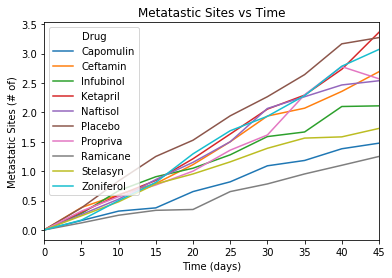

In [14]:
#efficient plot including proper legend, w/out error bars
metatastic_pivot.plot()
plt.title("Metatastic Sites vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites (# of)")

In [8]:
#A5

#Goal: Creating a scatter plot that shows the number of mice still alive
#through the course of treatment (Survival Rate)

#Create groupby object and convert to dataframe; current output is #of mice alive
grouped_data_micenum_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].count().reset_index()

#Create copy of dataframe so we can add a column containing Survival Rates
grouped_data_survivalrate_df = grouped_data_micenum_df

#Calculate percentage of mice remaining and store output in new column named 'Survival Rate'
grouped_data_survivalrate_df['Survival Rate'] = grouped_data_survivalrate_df['Metastatic Sites']/25*100
grouped_data_survivalrate_df.head(20)

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
#output is now Survival Rate (percentage of mice remaining)  
micesurvivalrate_pivot = pd.pivot_table(grouped_data_survivalrate_df, values = 'Survival Rate', index = ['Timepoint'], columns = 'Drug')

Text(0, 0.5, 'Survival Rate (%)')

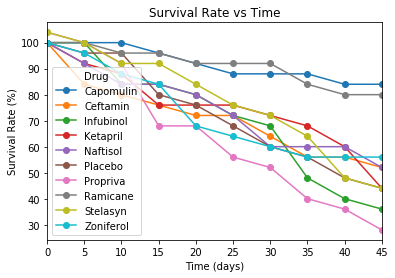

In [16]:
#create efficient plot of "Survival Rate vs Time", error bars n/a for this plot
micesurvivalrate_pivot.plot(marker='o')
plt.title('Survival Rate vs Time')
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

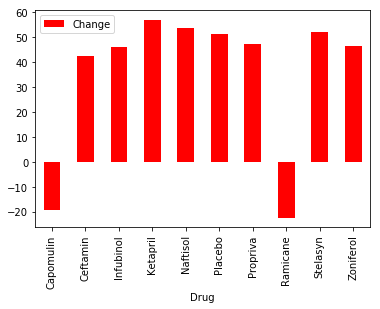

In [10]:
#A6

#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days

#Create a copy of earlier dataframe; "tumor vol vs timepoint" for each drug 
tumor_vol_df = grouped_data_vol_df
tumor_vol_df.head(20)

#We only want final volumes (at timepoint=45)
final_tumor_vol_df = tumor_vol_df.loc[tumor_vol_df['Timepoint'] == 45]
final_tumor_vol_df.head(10)

#initial volume of all tumors is 45
initial_vol = 45

#Calculate percentage change of tumor vol and store output in new column named 'Change'
final_tumor_vol_df['Change'] = (final_tumor_vol_df['Tumor Volume (mm3)']-initial_vol)/initial_vol*100
final_tumor_vol_df

#plot bar graph
final_tumor_vol_df.plot(kind='bar', x='Drug', y='Change', color = 'red')
